# Исследования рынĸа общепита в Мосĸве для принятия решения об отĸрытии нового заведения

## Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера</b>

Отличное начало проекта. Описание поможет вспомнить о чём файл, а содержание помогло бы с навигацией.

</div>

## Шаг №1. Загрузите данные и подготовьте их к анализу

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')

In [3]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


### Описание данных
Таблица rest_data:
- `id` — идентификатор объекта;

- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.

In [4]:
df.info()

print()
print(f'Колонок: {df.shape[1]}\nCтрок: {df.shape[0]}')
print('Количество пропусков:', df.isna().sum().sum())
print('Количество дубликатов:', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB

Колонок: 6
Cтрок: 15366
Количество пропусков: 0
Количество дубликатов: 0


Мы не обнаружили полных дубликатов, но есть неявные дубликаты, где отличаются только id и количество посадочных мест. Например:

In [5]:
df.loc[15362:15363,:]

,id,object_name,chain,object_type,address,number
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20


Проверим сколько таких

In [6]:
df.duplicated(subset=['object_name','chain','object_type','address']).sum()

170

Возможно количество посадочных мест отличается в зависимости от сезона, например летом появляется открытая веранда. Дубликаты можно удалить:
```python
df = df.drop_duplicates(subset=['object_name','chain','object_type','address'], keep='first')
```
Но преподаватель @Максим Захаров сказал что с ними ничего делать не надо

Заменим названия типов заведений для лучшей читаемости

In [7]:
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [8]:
df['object_type'] = df['object_type'].replace({'предприятие быстрого обслуживания':'фастфуд',
                                               'магазин (отдел кулинарии)':'кулинария'})

In [9]:
df['object_name'] = df['object_name'].str.lower()

In [10]:
df

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [11]:
df['id'].duplicated().sum()

0

##### Вывод

Загрузили данные, пропусков и дубликатов нет. Есть неявные дубликаты, с ними ничего не делали. Заменили названия заведений на более короткие. Представленная информация позволит нам провести анализ и сделать выводы.

## Шаг №2. Анализ данных

### Cоотношение видов объектов общественного питания по количеству.

In [12]:
print('Всего объектов общественного питания:', df['object_type'].count())
print('Видов объектов общественного питания:', df['object_type'].nunique())

rest_type = df['object_type'].value_counts().reset_index()

rest_type.columns = ['object_type', 'count']
rest_type

Всего объектов общественного питания: 15366
Видов объектов общественного питания: 9


,object_type,count
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,фастфуд,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,кулинария,273


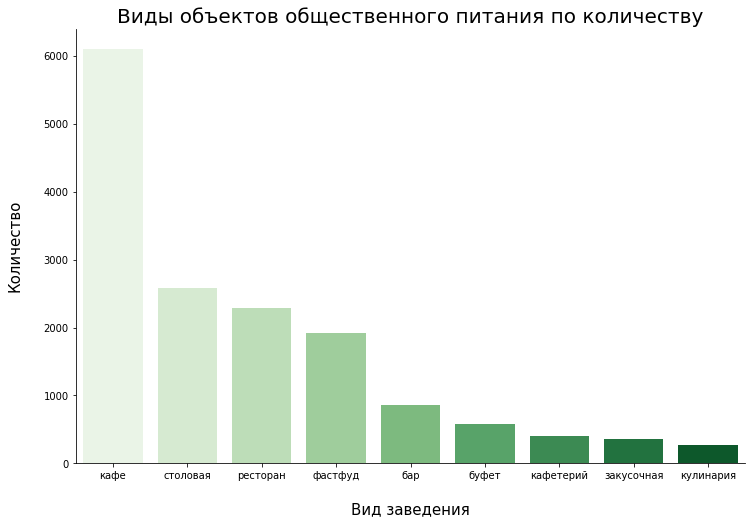

In [13]:
plt.figure(figsize=(12,8))

ax = sns.barplot(data=rest_type, y='count', x='object_type',palette='Greens')

ax.set_title('Виды объектов общественного питания по количеству', fontsize=20)
ax.set_ylabel('Количество\n', fontsize=15)
ax.set_xlabel('\nВид заведения', fontsize=15)


ax.set_xticklabels(rest_type['object_type'])
sns.despine()

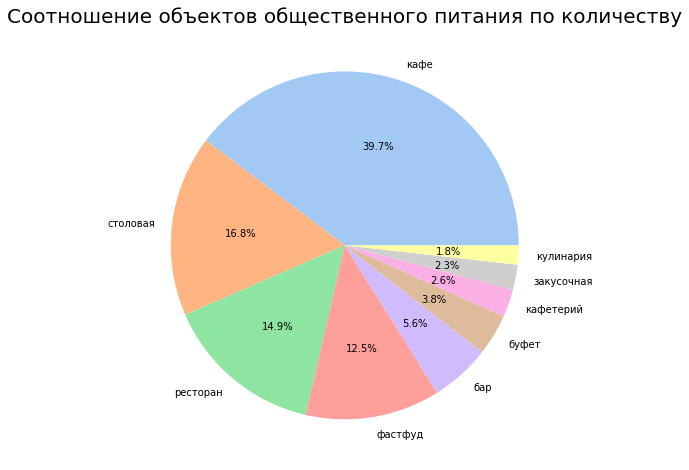

In [14]:
labels = rest_type.loc[:,'object_type'].values
data = rest_type.loc[:,'count'].values

colors = sns.color_palette('pastel')
plt.figure(figsize=(12,8))

plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Соотношение объектов общественного питания по количеству', fontsize=20)

plt.show()

### Вывод
Всего в таблице 15366 заведений общепита 9 видов. На первом месте кафе 6099(39,7%), затем идут столовая 2587(16,8%), ресторан 2285(14,9%), фастфуд 1923(12,5%). Остальных типов заведений менее 1000 на каждый.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера</b>

Хорошо. 
</div>

### Cоотношение сетевых и несетевых заведений.

In [15]:
# таблица сетевых и не сетевых заведений
df_chain = pd.pivot_table(df, values='id', index=['object_type'], columns=['chain'], aggfunc='count')
df_chain.columns=['chain','not_chain']

In [16]:
df_chain['chain, %'] = (df_chain['chain']/(df_chain['chain']+df_chain['not_chain'])*100).round(2)
df_chain['not_chain, %'] = (df_chain['not_chain']/(df_chain['chain']+df_chain['not_chain'])*100).round(2)
df_chain['total'] = df_chain['chain'] + df_chain['not_chain']

In [17]:
df_chain.sort_values('not_chain',ascending=False,inplace=True)
df_chain

,chain,not_chain,"chain, %","not_chain, %",total
object_type,,,,,
кафе,1396,4703,22.89,77.11,6099
столовая,3,2584,0.12,99.88,2587
ресторан,544,1741,23.81,76.19,2285
фастфуд,791,1132,41.13,58.87,1923
бар,37,819,4.32,95.68,856
буфет,11,574,1.88,98.12,585
кафетерий,52,346,13.07,86.93,398
закусочная,56,304,15.56,84.44,360
кулинария,78,195,28.57,71.43,273


In [18]:
# Соотношение сетевых и несетевых заведений всего
print('Количество сетевых заведений: {}, {:.2%}'.
      format(df_chain['chain'].sum(),
             df_chain['chain'].sum()/rest_type['count'].sum()))
print('Количество несетевых заведений: {}, {:.2%}'.
      format(df_chain['not_chain'].sum(),
             df_chain['not_chain'].sum()/rest_type['count'].sum()))

Количество сетевых заведений: 2968, 19.32%
Количество несетевых заведений: 12398, 80.68%


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера</b>

Вижу. 
</div>

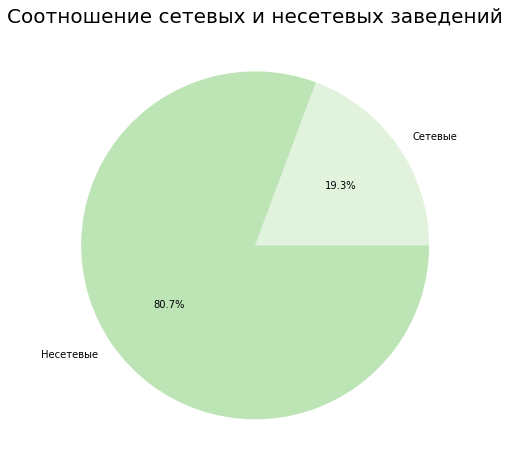

In [19]:
labels = 'Сетевые','Несетевые'
data = [df_chain['chain'].sum(), df_chain['not_chain'].sum()]

colors = sns.color_palette('Greens')
plt.figure(figsize=(12,8))

plt.pie(data, labels = labels, colors = colors, autopct='%.1f%%')
plt.title('Соотношение сетевых и несетевых заведений', fontsize=20)

plt.show()

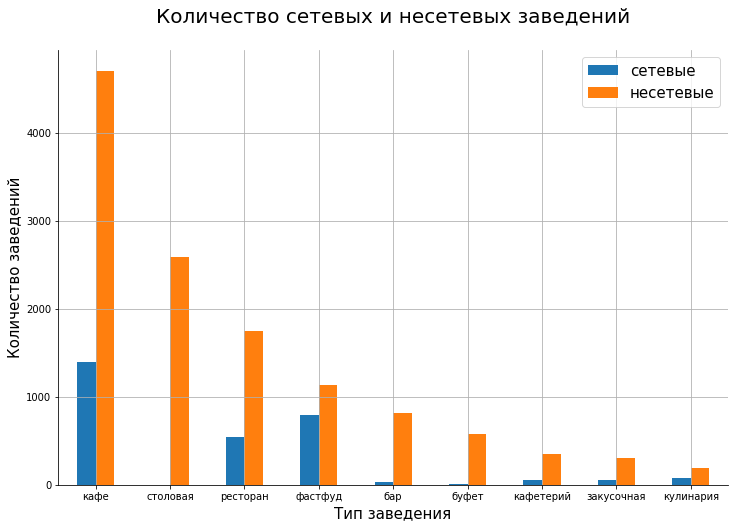

In [20]:
ax = df_chain[['chain','not_chain']].plot(kind='bar',figsize=(12,8),rot=0,grid=True)

ax.set_title('Количество сетевых и несетевых заведений\n', fontsize=20)
ax.set_xlabel('Тип заведения', fontsize=15)
ax.set_ylabel('Количество заведений', fontsize=15)
ax.legend(['сетевые', 'несетевые'], fontsize=15)

sns.despine()

### Для какого вида объекта общественного питания характерно сетевое распространение

In [21]:
df_chain.sort_values('chain, %',ascending=False,inplace=True)
df_chain

,chain,not_chain,"chain, %","not_chain, %",total
object_type,,,,,
фастфуд,791,1132,41.13,58.87,1923
кулинария,78,195,28.57,71.43,273
ресторан,544,1741,23.81,76.19,2285
кафе,1396,4703,22.89,77.11,6099
закусочная,56,304,15.56,84.44,360
кафетерий,52,346,13.07,86.93,398
бар,37,819,4.32,95.68,856
буфет,11,574,1.88,98.12,585
столовая,3,2584,0.12,99.88,2587


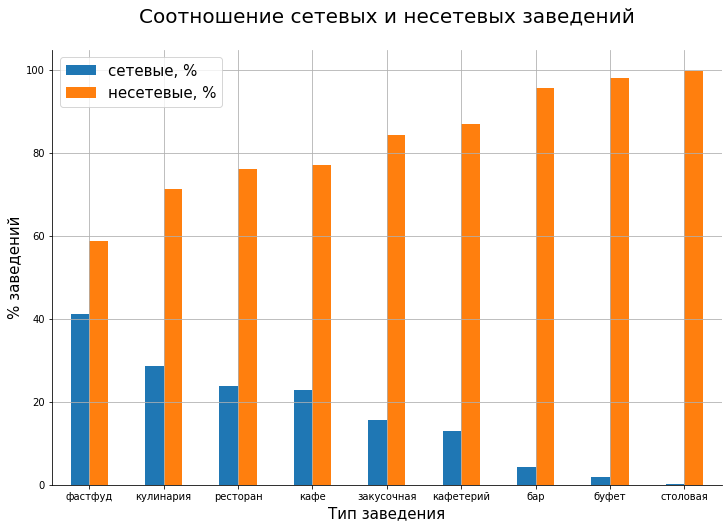

In [22]:
ax = df_chain[['chain, %','not_chain, %']].plot(kind='bar',rot=0, figsize=(12, 8),grid=True)

ax.set_title('Соотношение сетевых и несетевых заведений\n', fontsize=20)
ax.set_xlabel('Тип заведения', fontsize=15)
ax.set_ylabel('% заведений', fontsize=15)
ax.legend(['сетевые, %', 'несетевые, %'], fontsize=15)

sns.despine()

###### Вывод

В среднем на сетевые заведения приходится 19.32%(2968), на несетевые - 80,68%(12398).

Максимальное количество сетевых заведений приходится на кафе 1396 ед, минимальное на столовые - всего 3 единицы.

Максимальная доля сетевых заведений среди фастфуда 41,13% и минимальное среди столовых 0,12%

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [23]:
print('Медианное значение посадочных мест',df.groupby(['chain'])['number'].median())
print()
print('Среднее значение посадочных мест',df.groupby(['chain'])['number'].mean().round())

Медианное значение посадочных мест chain
да     40
нет    40
Name: number, dtype: int64

Среднее значение посадочных мест chain
да     53.0
нет    61.0
Name: number, dtype: float64


In [24]:
number_chain = (df.query('chain == "да"')
                .groupby('object_type')
                .agg({'number':['count','median','mean']}).round().sort_values(('number','count'),ascending=False))
number_chain.columns = ['chain_count','chain_median','chain_mean']

number_not_chain = (df.query('chain == "нет"')
                    .groupby('object_type')
                    .agg({'number':['count','median','mean']}).round())
number_not_chain.columns = ['not_chain_count','not_chain_median','not_chain_mean']
                    
numbers = number_chain.merge(number_not_chain,how='left', on='object_type')
numbers

,chain_count,chain_median,chain_mean,not_chain_count,not_chain_median,not_chain_mean
object_type,,,,,,
кафе,1396,40.0,47.0,4703,30,37.0
фастфуд,791,25.0,40.0,1132,0,7.0
ресторан,544,88.0,100.0,1741,75,96.0
кулинария,78,4.0,9.0,195,0,4.0
закусочная,56,8.0,14.0,304,0,6.0
кафетерий,52,8.0,12.0,346,6,9.0
бар,37,45.0,53.0,819,34,43.0
буфет,11,0.0,13.0,574,32,52.0
столовая,3,120.0,112.0,2584,103,130.0


###### Вывод

Среднее значение посадочных мест:
- сетевые заведения 53 посадочных места,
- несетевых заведения 61 посадочное место.

Хотя если посмотреть на таблицу выше, мы увидим, что для сетевых заведений характерно большее количество посадочных мест чем для несетевых.

Всю картину меняют `столовые` где среднее количество посадочных мест превышает 130 и практически все столовые несетевые заведения.

В целом, для сетевых заведений характерно много заведений с небольшим числом посадочных мест:
- `кафе`- 40,
- `фастфуд` - 25.

Так же для несетевых заведений фастфуда, кулинарии и закусочной отсутствие посадочных мест о чемговорит медианное значение = 0.

In [25]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [26]:
df_chain = df.query('chain == "да"').groupby('object_name').agg({'number':['count','mean']}).round()

In [27]:
df_chain.columns = ['count','mean']
df_chain.head()

,count,mean
object_name,,
beverly hills diner,1,88.0
bierloga,1,75.0
black & white,1,40.0
bocconcino,3,67.0
boobo,1,46.0


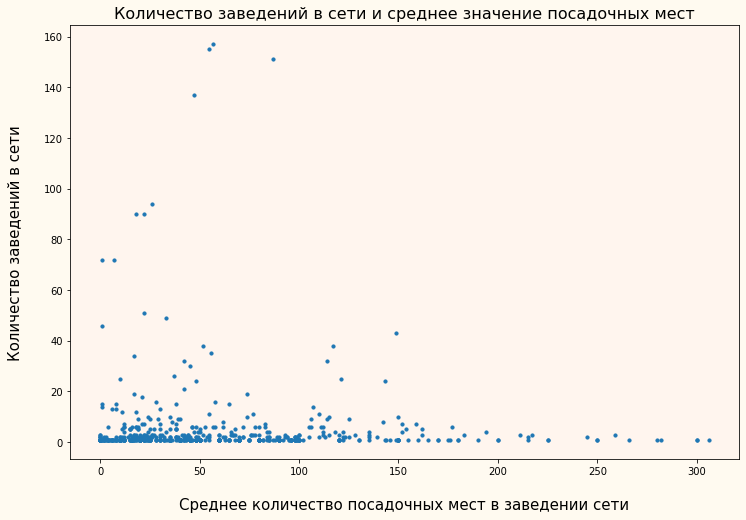

In [28]:
fig, ax = plt.subplots()

x = df_chain['mean']
y = df_chain['count']

ax.scatter(x, y, s=10)

ax.set_title('Количество заведений в сети и среднее значение посадочных мест', fontsize=16)
ax.set_xlabel('\nСреднее количество посадочных мест в заведении сети', fontsize=15)
ax.set_ylabel('Количество заведений в сети\n', fontsize=15)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')

fig.set_figwidth(12)
fig.set_figheight(8)

plt.show()

##### Вывод

Из графика видим, что значения характеризуются незначительным количеством заведений в сети и средним количеством посадочных мест 

In [29]:
df[df['object_name'].str.contains('starbucks')]['object_name'].unique()

array(['старбакс starbucks', 'starbucks', 'кафе «starbucks»',
       'кафе starbucks', 'starbucks кофе', 'starbucks, старбакс кофе',
       'starbucks старбакс', 'starbucks coffee', 'кофемания starbucks'],
      dtype=object)

In [30]:
df[df['object_name'].str.contains(r'starbucks')]['object_name'].nunique()

9

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [31]:
number = (df.groupby('object_type',as_index=False)
          .agg({'number':['count','median','mean']}).round())
          #.sort_values(('number','mean'),ascending=False))
number.columns = ['object_type','count','median','mean']
number = number.sort_values('mean',ascending=False)
number

,object_type,count,median,mean
7,столовая,2587,103,130.0
6,ресторан,2285,80,97.0
1,буфет,585,32,51.0
0,бар,856,35,43.0
3,кафе,6099,30,40.0
8,фастфуд,1923,5,21.0
4,кафетерий,398,6,9.0
2,закусочная,360,0,8.0
5,кулинария,273,0,6.0


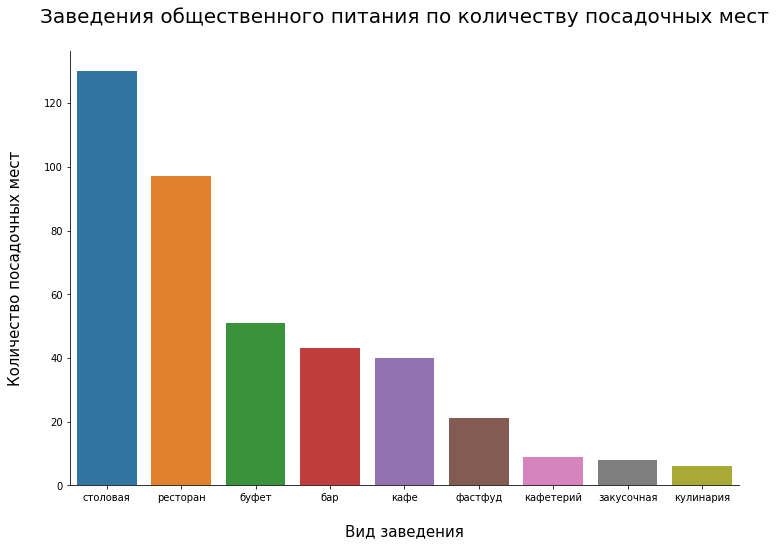

In [32]:
plt.figure(figsize=(12,8))

ax = sns.barplot(data=number, y='mean', x='object_type')

ax.set_title('Заведения общественного питания по количеству посадочных мест\n', fontsize=20)
ax.set_ylabel('Количество посадочных мест\n', fontsize=15)
ax.set_xlabel('\nВид заведения', fontsize=15)

ax.set_xticklabels(number['object_type'])
sns.despine()

##### Вывод

Максимальное среднее количество посадочных мест в столовых - 130 и ресторанах - 80, минимальное в кулинарии - 6 и закусочной - 8, где как было ранее указано часто встречается отсутствие посадочных мест.

### Выделите в отдельный столбец информацию об улице из столбца address

In [33]:
df['object_type'] = df['object_type'].replace({'предприятие быстрого обслуживания':'фастфуд',
                                               'магазин (отдел кулинарии)':'кулинария'})

In [34]:
# df['street'] = df['address'].apply(lambda x: x.split(', ')[1])
# df.drop(columns=['street'], inplace=True)  
#'город Троицк','город Зеленоград','город Московский','поселение','километр','деревня','посёлок',
street_types = (['улица','переулок','шоссе','проезд','проспект','бульвар','площадь','просек',
                 'набережная','квартал','аллея','линия','тупик','территория','микрорайон Северное'
                 ])
def street(address):
    street0 = address.split(',')[0]
    street1 = address.split(',')[1]

    for street_type in street_types:
        if street_type in street0:
            return street0.strip()
        if street_type in street1:
            return street1.strip()
    return 'n'

In [35]:
df['street'] = df['address'].apply(street)

In [36]:
df = df.query('street != "n"').reset_index(drop=True)
df.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


##### Вывод 

Для дальнейшего анализа мы выделили из адреса информацию об улице включая переулки, проспекты, площади и пр. Убрали из списка заведения находящиеся за пределами МКАД. Из всего списка адресов оставили 14506 адреса.

### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Загрузим внешние данные, используем файлы открытых данных mos.ru и mosgaz

In [37]:
from io import BytesIO
import requests
spreadsheet_id = '1rcnVH1c4pvf4HBQlLNLQBXXoIhkJeP8OcmUQxBMVBeM'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
district = pd.read_csv(BytesIO(r.content))

In [38]:
spreadsheet_id = '1KeqVxNir1dDCGadYt-8_L1EXR7ip75e1__728ZaAt_0'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
area = pd.read_csv(BytesIO(r.content))

Объединим данные поочередно

In [39]:
df_location = df.merge(district[['id','district']],how='left', on='id')
df_location = df_location.merge(area[['street','area']], how='left', on='street')

Заполним пропуски

In [40]:
df_location['district'].fillna(df_location['area'],inplace=True)

Удалим ненужные колонки и дубликаты

In [41]:
df_location.drop('area',axis=1,inplace=True)
df_location.drop_duplicates(['id'], keep='first', inplace=True)
df_location.reset_index(drop=True).head()

,id,object_name,chain,object_type,address,number,street,district
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский район
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Таганский район
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Таганский район
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,Район Лианозово
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,Район Лианозово


Удалим пропуски

In [42]:
df_location.dropna(inplace=True)
df_location.reset_index(drop=True, inplace=True)
df_location.isna().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
street         0
district       0
dtype: int64

In [43]:
top_street = (df_location['street']
          .value_counts()
          .reset_index()
          .rename(columns={'index':'street','street':'count'}) )

In [44]:
top_10 = top_street.head(10)
top_10

,street,count
0,проспект Мира,204
1,Профсоюзная улица,183
2,Ленинградский проспект,173
3,Пресненская набережная,167
4,Варшавское шоссе,162
5,Ленинский проспект,148
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


In [45]:
top_10 = top_street.head(10)

In [46]:
top_10_area = top_10.merge(area,how='left', on='street')
top_10_area.head()

,street,count,area
0,проспект Мира,204,Алексеевский район
1,проспект Мира,204,Ярославский Район
2,проспект Мира,204,Район Марьина роща
3,проспект Мира,204,Останкинский район
4,проспект Мира,204,Район Ростокино


In [47]:
top_10_area['street'].value_counts()

Ленинский проспект        8
Варшавское шоссе          8
проспект Мира             7
Профсоюзная улица         6
проспект Вернадского      5
Каширское шоссе           4
Ленинградский проспект    4
Кировоградская улица      3
Кутузовский проспект      2
Пресненская набережная    1
Name: street, dtype: int64

Районы где расположены топ-10 улиц по количеству заведений

In [48]:
top_10_area.area.unique()

array(['Алексеевский район', 'Ярославский Район', 'Район Марьина роща',
       'Останкинский район', 'Район Ростокино', 'Район Свиблово',
       'Мещанский район', 'Академический район', 'Район Черемушки',
       'Район Ясенево', 'Район Коньково', 'Обручевский район',
       'Район Теплый Стан', 'Район Аэропорт', 'Район Беговой',
       'Хорошевский район', 'Район Сокол', 'Пресненский район',
       'Район Чертаново Центральное', 'Район Чертаново Северное',
       'Район Чертаново Южное', 'Донской район',
       'Район Нагатино-Садовники', 'Нагорный район',
       'Район Северное Бутово', 'Район Южное Бутово',
       'Район Проспект Вернадского', 'Район Тропарево-Никулино',
       'Район Гагаринский', 'Ломоносовский район', 'Район Якиманка',
       'Район Раменки', 'Район Дорогомилово', 'Район Фили-Давыдково',
       'Район Москворечье-Сабурово', 'Район Орехово-Борисово Южное',
       'Район Орехово-Борисово Северное'], dtype=object)

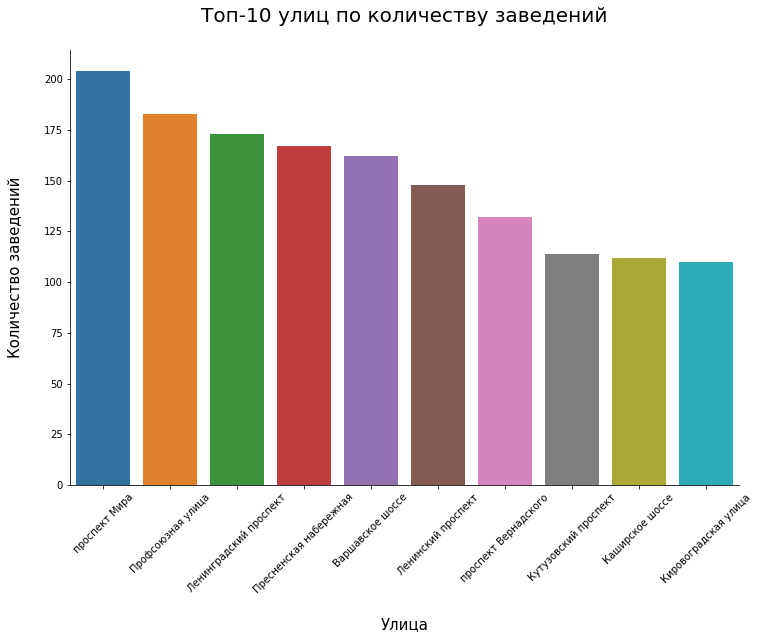

In [49]:
plt.figure(figsize=(12,8))

ax = sns.barplot(data=top_10, y='count', x='street')

ax.set_title('Топ-10 улиц по количеству заведений\n', fontsize=20)
ax.set_ylabel('Количество заведений\n', fontsize=15)
ax.set_xlabel('\nУлица', fontsize=15)


ax.set_xticklabels(top_10['street'], rotation=45)
sns.despine()

##### Вывод

На первом месте по количеству заведений общепита находятся улицы большой протяженностью, которые проходят через несколько районов Москвы. 
1. Проспект Мира - 204 заведения, проходит через 7 районов,
2. Профсоюзная улица - 183 заведения, проходит через 6 районов,
3. Ленинградский проспект - 173 заведения, проходит через 4 района. 

Для наших целей полученные данные малоинформативны тк не говорят о плотности расположения заведений.

### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [50]:
low_street = top_street.query('count == 1')
low_street.head()

,street,count
1277,улица Красных Зорь,1
1278,Прибрежный проезд,1
1279,Лениногорская улица,1
1280,Воротниковский переулок,1
1281,Несвижский переулок,1


In [51]:
low_street_district = low_street.merge(area,how='left', on='street')
low_street_district.head()

,street,count,area
0,улица Красных Зорь,1,Можайский Район
1,Прибрежный проезд,1,Район Левобережный
2,Прибрежный проезд,1,Молжаниновский район
3,Лениногорская улица,1,Район Косино-Ухтомский
4,Воротниковский переулок,1,Тверской район


In [52]:
print('Число улиц всего:', df_location.street.nunique())
print('Число улиц с одним объектом общественного питания:', low_street.street.nunique())
print('Число районов:',df_location.district.nunique())
print('Число районов где раположены улицы с одним объектом общепита:',low_street_district.area.nunique())

Число улиц всего: 1805
Число улиц с одним объектом общественного питания: 528
Число районов: 229
Число районов где раположены улицы с одним объектом общепита: 101


##### Вывод

Всего в таблице 1805 улиц на которых расположены заведения общепита. На 528(29%) улицах находится только 1 заведение. Указанные улицы проходят по 101 району Москвы из 229 упомянутых. Те почти в каждом втором районе Москвы есть улица только с 1 заведением общепита.

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

Как мы выяснили ранее, расположение улиц по районам это малополезная информация. Для целей анализа рассмотрим информацию в разрезе районов.

In [53]:
top_5_district = (df_location['district']
          .value_counts()
          .head(5)
          .reset_index()
          .rename(columns={'index':'district','district':'count'}))

In [54]:
print('Топ 5 районов по количеству заведений общепита:')
top_5_district

Топ 5 районов по количеству заведений общепита:


,district,count
0,Тверской район,885
1,Пресненский район,734
2,Басманный район,601
3,Даниловский район,485
4,Таганский район,441


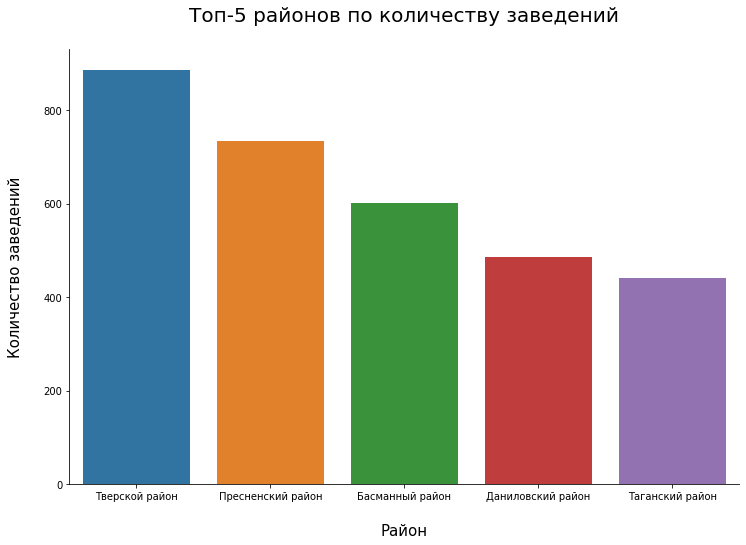

In [55]:
plt.figure(figsize=(12,8))

ax = sns.barplot(data=top_5_district, y='count', x='district')

ax.set_title('Топ-5 районов по количеству заведений\n', fontsize=20)
ax.set_ylabel('Количество заведений\n', fontsize=15)
ax.set_xlabel('\nРайон', fontsize=15)

sns.despine()

In [56]:
district_list = top_5_district.loc[:,'district'].values
district_list

array(['Тверской район', 'Пресненский район', 'Басманный район',
       'Даниловский район', 'Таганский район'], dtype=object)

In [57]:
top_streets = df_location.query('district in @district_list')['street'].value_counts().reset_index().head(10)
top_streets.columns = ['street','count']
print('Топ-10 улиц из топ-5 районов')
top_streets

Топ-10 улиц из топ-5 районов


,street,count
0,Пресненская набережная,167
1,улица Ленинская Слобода,89
2,улица Земляной Вал,80
3,улица Покровка,77
4,Тверская улица,68
5,Автозаводская улица,67
6,улица Сущёвский Вал,64
7,Лесная улица,62
8,улица Маросейка,60
9,Мясницкая улица,57


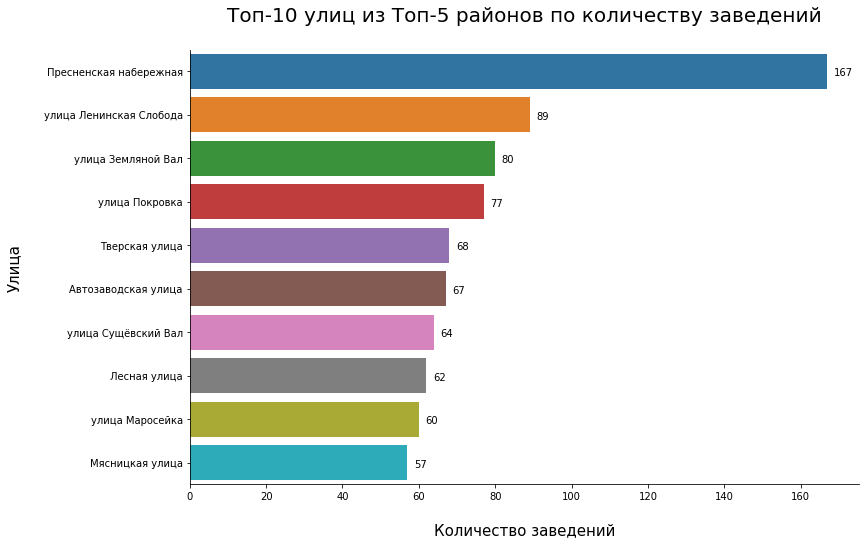

In [58]:
plt.figure(figsize=(12,8))
ax=sns.barplot(x='count', y='street', data=top_streets, 
               order = top_streets.sort_values('count', ascending = False).street)

ax.set_title('Топ-10 улиц из Топ-5 районов по количеству заведений\n', fontsize=20)
ax.set_ylabel('Улица\n', fontsize=15)
ax.set_xlabel('\nКоличество заведений', fontsize=15)

for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width()+3, p.get_y()+0.5),
                xytext=(-5, 0),textcoords='offset points')

sns.despine()

##### Вывод

Наиболее плотно заведения общепита расположены в центральных районах города:
1. Тверской район - 885 заведений, 
2. Пресненский район - 734 заведения,
3. Басманный район - 601 заведение,
4. Даниловский район - 485 заведений,
5. Таганский район - 441 заведений.

Наиболее популярные улицы этих районов:
1.	Пресненская набережная - 167 заведений,
2.	улица Ленинская Слобода - 89 заведений,
3.	улица Земляной Вал - 80 заведений.

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [59]:
street_list = top_streets.loc[:,'street'].values
street_list

array(['Пресненская набережная', 'улица Ленинская Слобода',
       'улица Земляной Вал', 'улица Покровка', 'Тверская улица',
       'Автозаводская улица', 'улица Сущёвский Вал', 'Лесная улица',
       'улица Маросейка', 'Мясницкая улица'], dtype=object)

Датафрейм по топ-10 улицам из топ-5 районов

In [60]:
df_top_streets = df_location.query('street in @street_list')
df_top_streets.head()

,id,object_name,chain,object_type,address,number,street,district
262,22596,гин-но-таки,нет,кафе,"город Москва, Тверская улица, дом 6, строение 1",270,Тверская улица,Тверской район
263,133843,голову с плеч,нет,бар,"город Москва, Тверская улица, дом 12, строение 1",20,Тверская улица,Тверской район
264,120430,хлеб и вино,нет,кафе,"город Москва, Тверская улица, дом 12, строение 2",65,Тверская улица,Тверской район
265,22605,бирхаус,нет,кафе,"город Москва, Тверская улица, дом 12, строение 7",56,Тверская улица,Тверской район
266,141533,с утра,нет,кафе,"город Москва, Тверская улица, дом 12, строение 8",48,Тверская улица,Тверской район


In [61]:
df_number = (df_top_streets.groupby('object_type')
             .agg({'number':['count','sum','mean']}).round()
             .sort_values(('number','sum'),ascending=False)
            )
df_number.columns=['count','sum','mean']

In [62]:
df_number

,count,sum,mean
object_type,,,
кафе,472,17929,38.0
ресторан,152,14804,97.0
бар,77,4239,55.0
столовая,16,1524,95.0
фастфуд,70,840,12.0
буфет,12,552,46.0
кафетерий,19,327,17.0
закусочная,6,172,29.0
кулинария,6,61,10.0


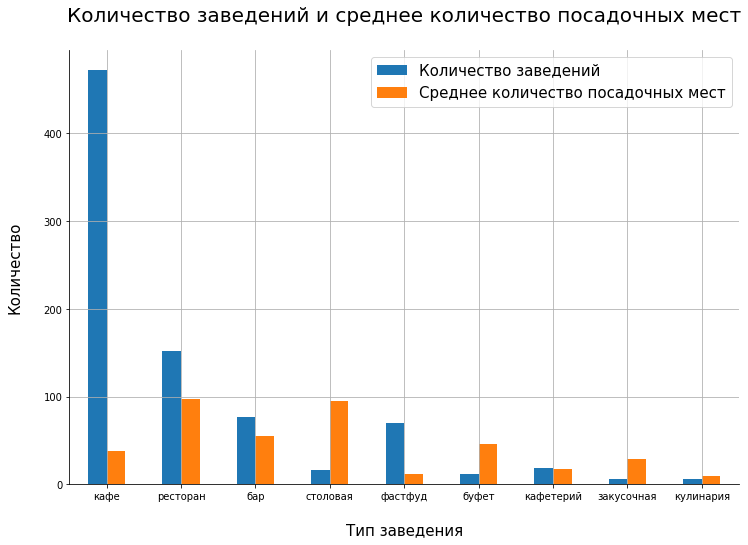

In [63]:
ax = df_number[['count','mean']].plot(kind='bar',figsize=(12,8),rot=0,grid=True)

ax.set_title('Количество заведений и среднее количество посадочных мест\n', fontsize=20)
ax.set_xlabel('\nТип заведения', fontsize=15)
ax.set_ylabel('Количество\n', fontsize=15)
ax.legend(['Количество заведений', 'Среднее количество посадочных мест'], fontsize=15)

sns.despine()

##### Вывод

Самые популярные типы заведений это:
- кафе - 472 заведения, 
- на втором месте рестораны - 152 заведения.

В среднем на кафе приходится 38 посадочных мест, на рестораны 97 посадочных места.

### Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

##### Вывод

В процессе анализы мы выделили 15366 заведений общепита 9 видов. На первом месте:
- кафе 6099(39,7%)
- столовая 2587(16,8%)
- ресторан 2285(14,9%)
- фастфуд 1923(12,5%)

Заведения общепита подразделяются на сетевые  и несетевые
- сетевые заведения - 2968(19.32%),
- несетевые - 12398(80,68%).

Максимальная доля сетевых заведений среди фастфуда 41,13% и минимальное среди столловых 0,12%

Среднее значение посадочных мест:
- сетевые заведения 53 посадочных места,
- несетевых заведения 61 посадочное место.

Максимальное среднее количество посадочных мест в столовых - 130 и ресторанах - 80, минимальное в куланарии - 6 и закусочной - 8

Для дальнейшего анализа мы выделили из адреса информацию об улице включая переулки, проспекты, площади и пр. Убрали из списка заведения находящиеся за пределами МКАД. Из всего списка адресов оставили 14506 адреса. Всего получили 1805 улиц на которых расположены заведения общепита.

На первом месте по количеству заведений общепита находятся улицы большой протяженностью, которые проходят через несколько районов Москвы.
- Проспект Мира - 204 заведения, проходит через 7 районов,
- Профсоюзная улица - 183 заведения, проходит через 6 районов,
- Ленинградский проспект - 173 заведения, проходит через 4 района.

Для наших целей полученные данные малоинформативны тк не говорят о плотности расположения заведений. Поэтому далее делали анализ в разрезе района местонахождения.

Наиболее плотно заведения общепита расположены в центральных районах города:
- Тверской район - 885 заведений,
- Пресненский район - 734 заведения,
- Басманный район - 601 заведение,
- Даниловский район - 485 заведений,
- Таганский район - 441 заведений.

Наиболее популярные улицы этих районов:
- Пресненская набережная - 167 заведений,
- улица Ленинская Слобода - 89 заведений,
- улица Земляной Вал - 80 заведений.

Самые популярные типы заведений на этих улицах:
- кафе - 472 заведения,
- на втором месте рестораны - 152 заведения.

В среднем на кафе приходится 38 посадочных мест, на рестораны 97 посадочных места.

Для реализации плана по открытию небольшого кафе где гостей должны обслуживать роботы подходят центральные районы города и улицы расположенные в этих районах.

Анализ подтвердил, что большое количество кафе на этих улицах говорит о их восстребованности. Количество посадочных мест также отражает план по небольшому кафе.

**Итог: небольшое кафе в среднем 30-40 посадочных мест на Пресненской набережной в районе Москва-Сити.
В дальнейшем возможно развитие сети, по результатам работы первого объекта.**

## Шаг №3. Подготовка презентации
Подготовьте презентацию исследования для инвесторов. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf. Приложите ссылку на презентацию в markdown-ячейке в формате:

Презентация: https://drive.google.com/file/d/1TZLrYXoYOfnf6lI0-IDI4a1x_Amui1gC/view?usp=sharing
